## DTMF Project Part 2: Encoding digits into DTMF sound files and creating your data base

In [1]:
# Import libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import wavfile

### Objective
In this first part of the project you are encoding the keypad digits into DTMF sound files and are creating your data base


**DTMF encoding:** Each keypad digit is encoded using two frequencies. The frequencies are chosen in such a way that they typically do not occur together naturally and thus will not be created accidentally. The phase shifts for each signal is chosen randomly.

$$ y(t)= A\cdot \cos(2\pi f_1 t+\phi_1) + A\cdot \cos(2\pi f_2 t+\phi_2)$$

The frequencies $f_1$ and $f_2$ are determined by the position of the digit on the keypad and are shown below, where $f_1$ is determined by the row and $f_2$ by the column of the position. 

![](https://ptolemy.berkeley.edu/eecs20/week2/keypad.gif)

This row-column assignment of frequencies allows the use of a frequency for several keys and thereby reduces cost.

### Tasks (20 points)

#### Task-1 (3 points)
For each of the digits 0 - 9 and the * and # key, create 1 second of the corresponding sound signal. For the phase shifts, you need to pick a random value from the variable `all_phi` given below. Store each signal as a separate wav-file and listen to it.

In [45]:
A = 0.4 # amplitude
all_phi = np.arange(0,2*np.pi,np.pi/1000) # phase shift
freq_horizontal = [1209, 1336, 1477] #storing the column frequencies
freq_vertical = [697, 770, 852, 941] #storing the row frequencies
fs=8000;
B=16;

t=np.arange(0,1,1/fs) # discretized time (1 second duration)
def wav_maker(key_pressed, repetitions=1, makeFile = True): #the input must be a string for it to work since # is used to write notes. Defulat repetitions set to 1, meant to be changed during task 3 so different wav files can be made with different names in the same function
    if key_pressed == '1':
        freq = freq_horizontal[0]
        freq_2 = freq_vertical[0]
    elif key_pressed == '2':
        freq = freq_horizontal[1]
        freq_2 = freq_vertical[0]
    elif key_pressed == '3':
        freq = freq_horizontal[2]
        freq_2 = freq_vertical[0]
    elif key_pressed == '4':
        freq = freq_horizontal[0]
        freq_2 = freq_vertical[1]
    elif key_pressed == '5':
        freq = freq_horizontal[1]
        freq_2 = freq_vertical[1]
    elif key_pressed == '6':
        freq = freq_horizontal[2]
        freq_2 = freq_vertical[1]
    elif key_pressed == '7':
        freq = freq_horizontal[0]
        freq_2 = freq_vertical[2]
    elif key_pressed == '8':
        freq = freq_horizontal[1]
        freq_2 = freq_vertical[2]
    elif key_pressed == '9':
        freq = freq_horizontal[2]
        freq_2 = freq_vertical[2]
    elif key_pressed == '*':
        freq = freq_horizontal[0]
        freq_2 = freq_vertical[3]
    elif key_pressed == '0':
        freq = freq_horizontal[1]
        freq_2 = freq_vertical[3]
    elif key_pressed == '#':
        freq = freq_horizontal[2]
        freq_2 = freq_vertical[3]
    else:
        print('Key not on numpad please retry and enter another number')
    yqList = [] #makes an empty list for yq's to be appended to if repetitions > 1
    for x in range (repetitions):
        phase_shift_1 = np.random.choice(all_phi)
        phase_shift_2 = np.random.choice(all_phi)
        y = (A * (np.cos((2*np.pi*freq*t)+phase_shift_1))) + (A * (np.cos((2*np.pi*freq_2*t)+phase_shift_2)))
        yq = (2**(B-1))*y
        yq = yq.astype(np.int16)
        yqList.append(yq) #To get multiple yq's if repetitions > 1
        if makeFile == True: #So you don't have to save the function as a wav file if you don't want to. Default set to True
            if repetitions == 1: #for making only one wav file in the function (default). Since we're only making one file, we don't have to add num x to the file name
                if key_pressed == ('1' or '2' or '3' or '4' or '5' or '6' or '7' or '8' or '9' or '0'): #used to name the wav files when the button can be put into a filename
                    wavfile.write('button'+key_pressed+'.wav', fs, y)
                elif key_pressed == '*': #since file names cannot have * or #
                    wavfile.write('asterisk.wav',fs,y)
                elif key_pressed == '#':
                    wavfile.write('hashtag.wav',fs,y)
            elif repetitions > 1: #for making multiple wav files in the same functions. Since they have to have different names to be saved as differentt files we add num x to the filename so that each name is unique
                if key_pressed == ('1' or '2' or '3' or '4' or '5' or '6' or '7' or '8' or '9' or '0'): #used to name the wav files
                    wavfile.write('button'+key_pressed+'num'+str(x)+'.wav', fs, y)
                elif key_pressed == '*': #since file names cannot have * or #
                    wavfile.write('asterisk'+'num'+str(x)+'.wav',fs,y)
                elif key_pressed == '#':
                    wavfile.write('hashtag' +'num'+str(x)+'.wav',fs,y)
    if repetitions == 1:
        if(makeFile == False): #for Task-5
            return(freq, freq_2, phase_shift_1, phase_shift_2)
        else:
            return(yq, y) #Only returns the nparray of yq if repetitions = 1 (default)
    elif repetitions > 1:
        return(yqList) #Returns a list of yq nparray's if repetitions > 1 (for task 3)
# Complete task-1 here (you do not have to submit the sound files)
one = wav_maker('1')
two = wav_maker('2')
three = wav_maker('3')
four = wav_maker('4')
five = wav_maker('5')
six = wav_maker('6')
seven = wav_maker('7')
eight = wav_maker('8')
nine = wav_maker('9')
asterisk = wav_maker('*')
zero = wav_maker('0')
hashtag = wav_maker('#')

#### Task-2  (3 points): 
Graph the first 10 milliseconds of all signals generated in Task 1.

In [3]:
def graph_maker(y):
    plt.plot(t, y, marker = 'x')
    plt.grid()
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Amplitude as a function of time')
    plt.xlim([0, 0.01])

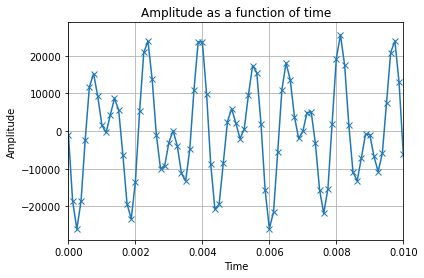

In [4]:
graph_maker(one[0])

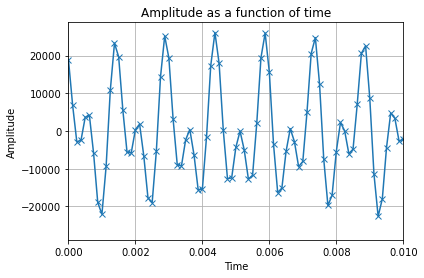

In [5]:
graph_maker(two[0])

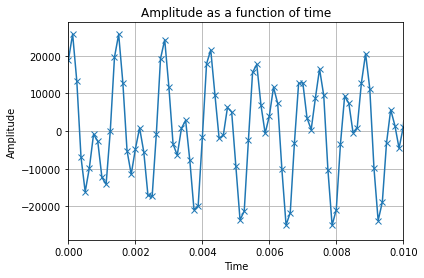

In [6]:
graph_maker(three[0])

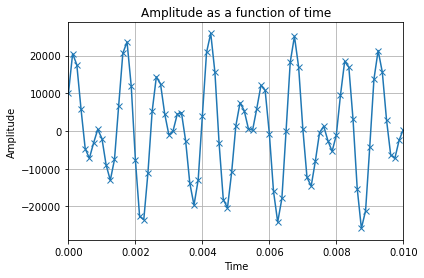

In [7]:
graph_maker(four[0])

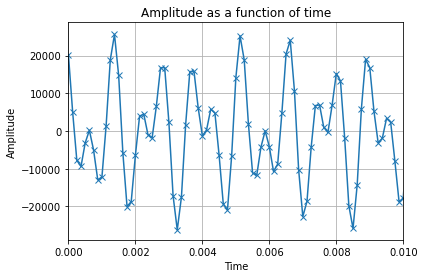

In [8]:
graph_maker(five[0])

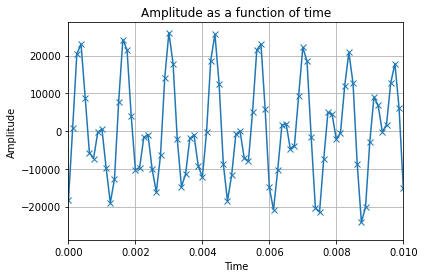

In [9]:
graph_maker(six[0])

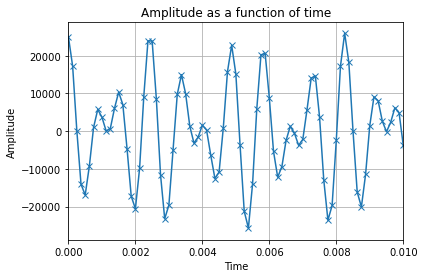

In [10]:
graph_maker(seven[0])

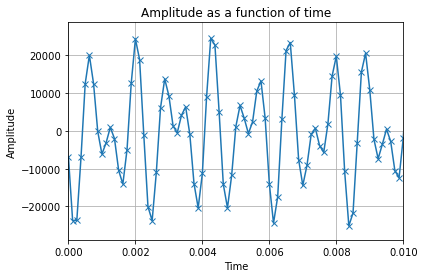

In [11]:
graph_maker(eight[0])

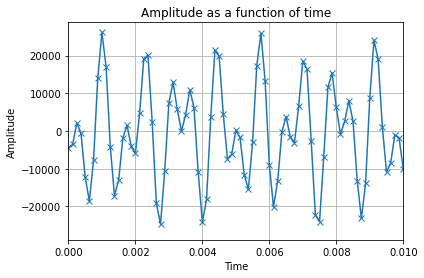

In [12]:
graph_maker(nine[0])

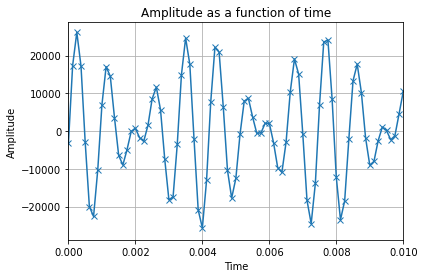

In [13]:
graph_maker(asterisk[0])

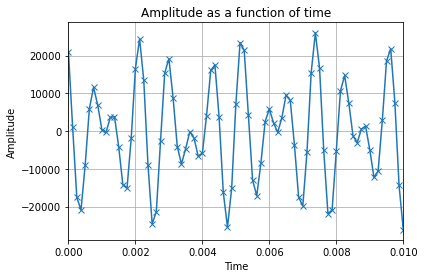

In [14]:
graph_maker(zero[0])

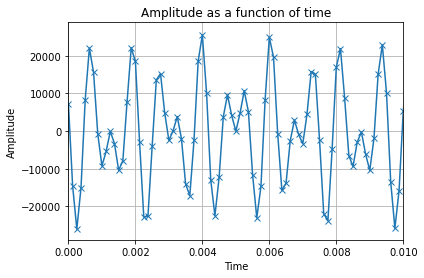

In [15]:
graph_maker(hashtag[0])

#### Task-3  (4 points): 
Choose a single digit from the keypad and generate the corresponding signal for it 5 times, each time randomly choosing the phase shifts $\phi_1$ and $\phi_2$. Store each version as a wav-file and listen to it. Do you hear any difference between the signals?

In [16]:
# COMPLETE TASK-3 HERE
one_5_reps = wav_maker('1', 5) #Making 5 repetitions of the signal for digit 1, each with a random phase shift 1 and phase shift 2

**YOUR ANSWER GOES HERE**

We found that there was no audible difference in the signals.

#### Task-4  (5 points): 
Graph the first 10 milliseconds of all 5 signals generated in Task 3. Describe similarities and differences.

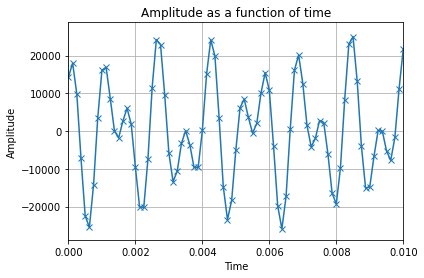

In [17]:
# COMPLETE TASK-4 HERE
graph_maker(one_5_reps[0])

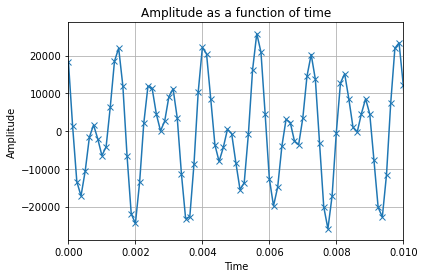

In [20]:
graph_maker(one_5_reps[1])

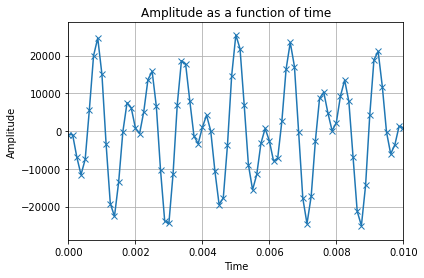

In [18]:
graph_maker(one_5_reps[2])

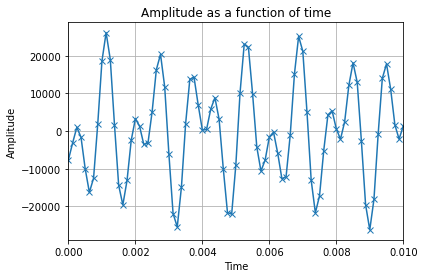

In [19]:
graph_maker(one_5_reps[3])

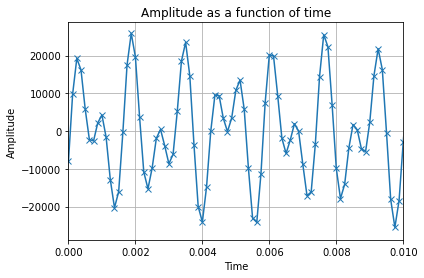

In [20]:
graph_maker(one_5_reps[4])

**YOUR ANSWER GOES HERE**

The graphs are the same except that they are offset horizontally because of the different phase shift

#### Task-5 (5 points):
Create a data base containing 10000 signals. For each signal choose a digit (0-9) or the * and # key randomly, then select the corresponding frequencies. Each signal should have a length of 1 second and randomly chosen phase shifts. Store all 10000 signals in a file.

In Part-3 of this project you will use this project your will select a signal from this data base and then recover the number it corresponds to.

Before starting this task, discuss as a group in which format you want to store the signals. They should all be stored in a single file. It should be easy to select and extract a single signal again. You should also store the "ground truth", i.e. the number that corresponds to the signal. You need to describe the how you decided to store your signal below. You also need to upload the file with this part of the project.

In [55]:
# COMPLETE TASK-5 HERE
keys = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '*', '#'] #List of the keys possible on a keypad
freq_1_database = []
freq_2_database = []
phase_shift_1_database = []
phase_shift_2_database = [] 
key_database = []
for x in range (10000):
    key = np.random.choice(keys)#Randomly choosing a key
    y = wav_maker(key, makeFile=False)#Calling the function using the randomly chosen key
    freq_1_database.append(y[0])
    freq_2_database.append(y[1])
    phase_shift_1_database.append(y[2])
    phase_shift_2_database.append(y[3])
    key_database.append(key)#Saving the key so the kay can also be saved in the dataframe
Signal_Dataframe = pd.DataFrame(list(zip(key_database, freq_1_database, freq_2_database, phase_shift_1_database, phase_shift_2_database)), columns  = ['Key', 'Frequency 1', 'Frequency 2', 'Phase Shift 1', 'Phase Shift 2'])
Signal_Dataframe.to_csv('SignalDataframe.csv', index = False)

In [56]:
Signal_Dataframe.head()

,Key,Frequency 1,Frequency 2,Phase Shift 1,Phase Shift 2
0,1,1209,697,4.247433,0.012566
1,3,1477,697,0.911062,3.625398
2,7,1209,852,2.730044,5.783672
3,4,1209,770,2.305929,0.760265
4,#,1477,941,2.560398,4.329115


In [57]:
x = pd.read_csv('SignalDataframe.csv')
x.head()

,Key,Frequency 1,Frequency 2,Phase Shift 1,Phase Shift 2
0,1,1209,697,4.247433,0.012566
1,3,1477,697,0.911062,3.625398
2,7,1209,852,2.730044,5.783672
3,4,1209,770,2.305929,0.760265
4,#,1477,941,2.560398,4.329115


**YOUR ANSWER GOES HERE**

We decided that we would save the Key and the Signal in their own separate columns instead of having the index be the key because we are more familiar with conditionally selecting from columns and not the index. The key column holds the string that was used in the function to create the signal, and the Signal column holds the list of 8000 y values needed to make the one second long signal.